In [2]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100,1)
theta0 = 4
theta1 = 3
y = (theta0 + theta1 * X) +np.random.randn(100,1)



In [3]:


#plt.axes().set_aspect('equal', 'box')

def h(X,theta):
    return np.dot(X,theta)

m = y.shape[0]
def Cost(theta,X,y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)

def analytical_solution(X_input, y):
    val1 = np.linalg.inv(np.dot(np.transpose(X_input),X_input))
    val2 = np.dot(np.transpose(X_input),y)
    theta = np.dot(val1,val2)
    return theta



In [4]:
X = np.insert(X, 0, 1, axis=1)
theta_analytical = analytical_solution(X,y)
y_analytical = np.array([theta_analytical[0]*X[:,0] + theta_analytical[1]*X[:,1]]).T

score_predicted = 1-((y-y_analytical)**2).sum()/((y-y.mean())**2).sum()


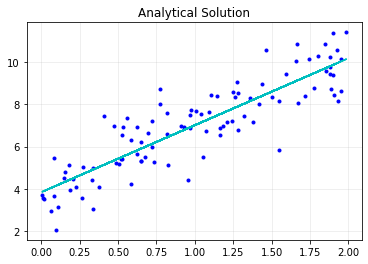

In [5]:
fig1 = plt.figure()
ax = plt.axes()
plt.title('Analytical Solution')
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
plt.plot(X[:,1],y_analytical,'c-')
plt.show()


In [9]:

print('theta analytical ', np.round(theta_analytical[0][0], decimals=2),',', np.round(theta_analytical[1][0], decimals=2))
print('cost ', Cost(theta_analytical,X, y)[0][0])
print('accuracy ', np.round(score_predicted*100, decimals=4))


theta analytical  3.84 , 3.17
cost  0.5333254390728621
accuracy  77.099


In [10]:

def gradient(X,y,theta):
    grad = X.T.dot(h(X,theta)-y)
    return grad

def gradientDescent(X, y, theta, alpha, num_iters):
    J_iter = np.zeros(num_iters)
    theta_iter = np.array([[],[]])
    gradient_iter = np.array([[],[]])
    for iter in np.arange(num_iters):
        theta = theta - alpha*(1/m)*gradient(X,y,theta)        
        J_iter[iter] = Cost(theta,X,y)[0][0]          
        theta_iter = np.append(theta_iter, theta, axis = 1)            
        gradient_iter = np.append(gradient_iter, gradient(X,y,theta)/len(X), axis = 1)                   
    return (theta,J_iter, np.transpose(theta_iter), np.transpose(gradient_iter))



In [20]:

alpha = .003
n_iter = 1500

theta_initial = np.random.randn(2,1)
#theta = np.transpose(np.array([[4,3]]))

theta_gd,j_iter, theta_iter, gradient_iter = gradientDescent(X,y,theta_initial,alpha,n_iter)
y_gd = np.array([theta_gd[0]*X[:,0] + theta_gd[1]*X[:,1]]).T

gradient_magnitude = np.sqrt(np.square(gradient_iter[:,0]) + np.square(gradient_iter[:,1]))
gradient_x = gradient_iter[:,0]

gradient_y = gradient_iter[:,1]


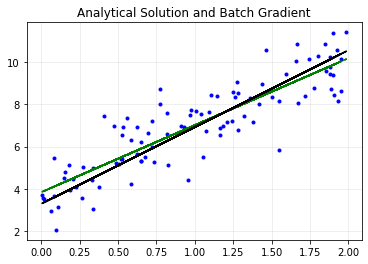

In [21]:

fig2 = plt.figure()
ax = plt.axes()
plt.title('Analytical Solution and Batch Gradient')
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
plt.plot(X[:,1],y_analytical,'g--')
plt.plot(X[:,1],y_gd,'k-')
plt.show()


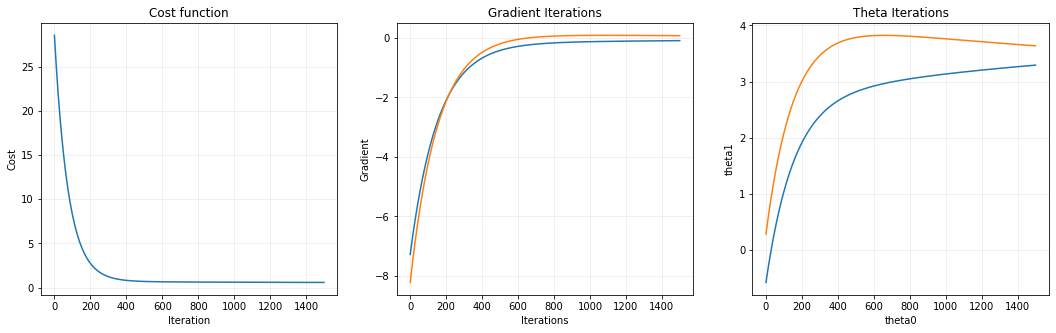

theta  3.29 , 3.64
cost  0.5759540980776587
accuracy  75.2685


In [22]:

fig3, ax = plt.subplots(1,3)
fig3.set_figheight(5)
fig3.set_figwidth(20)
fig3.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)


plt1.grid(axis='both', alpha=.25)
plt1.plot(np.arange(n_iter), j_iter,'-')
plt1.set_xlabel('Iteration')
plt1.set_ylabel('Cost')
plt1.set_title('Cost function')

plt2.set_title('Gradient Iterations')
plt2.set_xlabel('Iterations')
plt2.set_ylabel('Gradient')
plt2.grid(axis='both', alpha=.25)
plt2.plot(np.arange(n_iter), gradient_iter[:,0])
plt2.plot(np.arange(n_iter), gradient_iter[:,1])

plt3.set_title('Theta Iterations')
plt3.set_xlabel('theta0')
plt3.set_ylabel('theta1')
plt3.grid(axis='both', alpha=.25)
plt3.plot(np.arange(n_iter), theta_iter[:,0])
plt3.plot(np.arange(n_iter), theta_iter[:,1])
plt.show()
print('theta ', np.round(theta_gd[0][0], decimals=2),',' ,np.round(theta_gd[1][0], decimals=2))
print('cost ', Cost(theta_gd,X, y)[0][0])
score_predicted = 1-((y-y_gd)**2).sum()/((y-y.mean())**2).sum()
print('accuracy ', np.round(score_predicted*100, decimals=4))

### Iterations

In [25]:
def gradientDescent_iterations(X, y, theta, alpha):
    J_iter = np.array([])
    theta_iter = np.array([[],[]])
    gradient_iter = np.array([[],[]])
    i = 0
    j = 1
    iterations = 0
    while i < j:
        theta = theta - alpha*(1/m)*gradient(X,y,theta)        
        J_iter = np.append(J_iter, Cost(theta,X,y)[0][0])
        theta_iter = np.append(theta_iter, theta, axis = 1) 
        gradient_periter =  abs(gradient(X,y,theta)/len(X))          
        if (gradient_periter[0][0] < .01 and gradient_periter[1][0] < .01):
            i = j +2
        gradient_iter = np.append(gradient_iter, gradient_periter, axis = 1)
        iterations = iterations + 1                    
    return (theta,J_iter, np.transpose(theta_iter), np.transpose(gradient_iter), iterations)


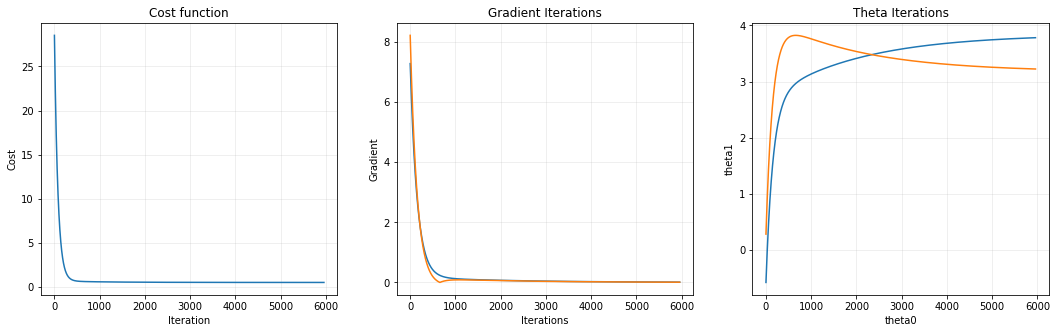

In [26]:
theta_gdv,j_iterv, theta_iterv, gradient_iterv, iterations_optimal = gradientDescent_iterations(X,y,theta_initial,alpha)
y_gdv = np.array([theta_gdv[0]*X[:,0] + theta_gdv[1]*X[:,1]]).T
gradient_magnitudev = np.sqrt(np.square(gradient_iterv[:,0]) + np.square(gradient_iterv[:,1]))
gradient_xv = gradient_iterv[:,0]
gradient_yv = gradient_iterv[:,1]

fig4, ax = plt.subplots(1,3)
fig4.set_figheight(5)
fig4.set_figwidth(20)
fig4.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)


plt1.grid(axis='both', alpha=.25)
plt1.plot(np.arange(iterations_optimal), j_iterv,'-')
plt1.set_xlabel('Iteration')
plt1.set_ylabel('Cost')
plt1.set_title('Cost function')

plt2.set_title('Gradient Iterations')
plt2.set_xlabel('Iterations')
plt2.set_ylabel('Gradient')
plt2.grid(axis='both', alpha=.25)
plt2.plot(np.arange(iterations_optimal), gradient_iterv[:,0])
plt2.plot(np.arange(iterations_optimal), gradient_iterv[:,1])

plt3.set_title('Theta Iterations')
plt3.set_xlabel('theta0')
plt3.set_ylabel('theta1')
plt3.grid(axis='both', alpha=.25)
plt3.plot(np.arange(iterations_optimal), theta_iterv[:,0])
plt3.plot(np.arange(iterations_optimal), theta_iterv[:,1])
plt.show()

In [27]:
score_predicted = 1-((y-y_gdv)**2).sum()/((y-y.mean())**2).sum()
print('theta ', np.round(theta_gdv[0][0], decimals=2),',', np.round(theta_gdv[1][0], decimals=2))
print('cost ', Cost(theta_gdv,X, y)[0][0])
print('accuracy ', np.round(score_predicted*100, decimals=4))
print('Iterations_optimal ', iterations_optimal)


theta  3.78 , 3.22
cost  0.5338465747325981
accuracy  77.0766
Iterations_optimal  5958


In [ ]:
theta_gdi,j_iteri, theta_iteri, gradient_iteri = gradientDescent(X,y,theta_initial,alpha,iterations_optimal)
y_gdi = np.array([theta_gdi[0]*X[:,0] + theta_gdi[1]*X[:,1]]).T


fig5, ax = plt.subplots(1,3)
fig5.set_figheight(5)
fig5.set_figwidth(20)
fig4.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)


plt1.grid(axis='both', alpha=.25)
plt1.plot(np.arange(iterations_optimal), j_iterv,'-')
plt1.set_xlabel('Iteration')
plt1.set_ylabel('Cost')
plt1.set_title('Cost function')

plt2.set_title('Gradient Iterations')
plt2.set_xlabel('Iterations')
plt2.set_ylabel('Gradient')
plt2.grid(axis='both', alpha=.25)
plt2.plot(np.arange(iterations_optimal), gradient_iteri[:,0])
plt2.plot(np.arange(iterations_optimal), gradient_iteri[:,1])

plt3.set_title('Theta Iterations')
plt3.set_xlabel('theta0')
plt3.set_ylabel('theta1')
plt3.grid(axis='both', alpha=.25)
plt3.plot(np.arange(iterations_optimal), theta_iteri[:,0])
plt3.plot(np.arange(iterations_optimal), theta_iteri[:,1])
plt.show()
print('theta ', np.round(theta_gdi[0][0], decimals=2),',', np.round(theta_gdi[1][0], decimals=2))
print('cost ', Cost(theta_gdi,X, y)[0][0])
